# Shadow Test

Another standard example scenario for testing raytracing algorithms is the so-called _shadow test_ [(Iliev+ 2006)](https://arxiv.org/abs/astro-ph/0603199). 

This consists of an ionizing front (_I-front_) interacting with denser regions, a density clump, and the formation of a shadow behind these regions.

In [2]:
import pyc2ray as pc2r
import numpy as np, matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

Define some global parameters and instance the test simulation class.

In [3]:
# Global parameters
num_steps_between_slices = 10
numzred = 2
show_plot = True

# Create C2Ray object
sim = pc2r.C2Ray_Test(paramfile='parameters_shadow.yml')

Number of GPUS 1
GPU Device ID 0: "NVIDIA RTX A1000 6GB Laptop GPU" with compute capability 8.6
Successfully allocated 67.1089 Mb of device memory for grid of size N = 128, with source batch size 1
                 _________   ____            
    ____  __  __/ ____/__ \ / __ \____ ___  __
   / __ \/ / / / /    __/ // /_/ / __ `/ / / /
  / /_/ / /_/ / /___ / __// _, _/ /_/ / /_/ / 
 / .___/\__, /\____//____/_/ |_|\__,_/\__, /  
/_/    /____/                        /____/   

Welcome! Mesh size is N = 128.
Simulation Box size (comoving Mpc): 1.400e-02
Cosmology is off.
Using power-law opacity with 10,000 table points between tau=10^(-20) and tau=10^(4)
Using Black-Body sources with effective temperature T = 5.0e+04 K and Radius  1.437e-11 rsun
Spectrum Frequency Range: 3.288e+15 to 1.316e+17 Hz
This is Energy:           1.360e+01 to 5.442e+02 eV
Integrating photoionization rates tables...
INFO: No heating rates
Successfully copied radiation tables to GPU memory.

---- Calculated Clumpin

Read the source file and define some redshift step.

In [4]:
# Generate redshift list (test case)
zred_array = sim.generate_redshift_array(numzred, 1e7)

# Read sources
numsrc = 1
srcpos, srcflux = sim.read_sources("src.txt", numsrc)

## Clump region

Generate a density field with a clump reagion.

In [5]:
# Setup density
avgdens = 1e-4 #sim.avg_dens

# box side in kpc
xc = np.linspace(0, sim.boxsize*1000, sim.N)
X,Y,Z = np.meshgrid(xc,xc,xc)

# Denser region position and size
#shadow_pos = np.array([76,76,sim.N//2])
shadow_pos = np.array([int(sim.N*3/4),int(sim.N*3/4),sim.N//2])
shadow_radius = 8
shadow_fact = 10

# background 
ndens = avgdens*np.ones((sim.N,sim.N,sim.N))
for i in range(ndens.shape[0]):
    for j in range(ndens.shape[1]):
        for k in range(ndens.shape[2]):
            if (i-shadow_pos[0])**2 + (j-shadow_pos[1])**2 + (k-shadow_pos[2])**2 < shadow_radius**2:
                ndens[i,j,k] = shadow_fact*avgdens

Plot the density field to look at the denser clump.

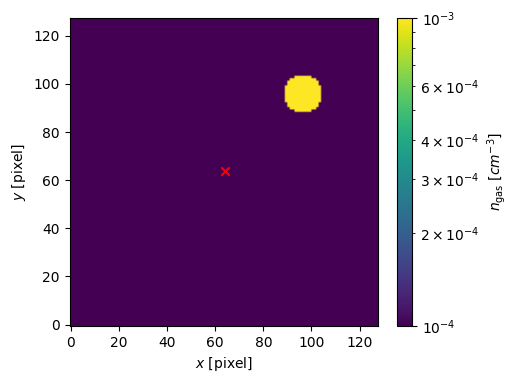

(None, None)

<Figure size 640x480 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(5, 4), ncols=1, nrows=1)
im = ax.imshow(ndens[:,:,sim.N//2], norm=LogNorm(), origin='lower')

plt.scatter(x=srcpos[0], y=srcpos[1], marker='x', color='red')
plt.colorbar(im, ax=ax, label=r'$n_\mathrm{gas}$ $[cm^{-3}]$')
ax.set_xlabel('$x$ [pixel]') 
ax.set_ylabel('$y$ [pixel]')
plt.show(), plt.clf()

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 1.200e-03
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.38s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 1123115 of 2097152 ( 53.554 % ), Relative change in ionfrac:  1.24e+02
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 827132 of 2097152 ( 39.441 % ), Relative change in ionfrac:  4.47e-01
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 595268 of 2097152 ( 28.385 % ), Relative change in ionfrac:  1.80e-01
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 348580 of 2097152 ( 16.622 % ), Relative change in ionfrac:  5.24e-02
Rank=0 is doing Raytr

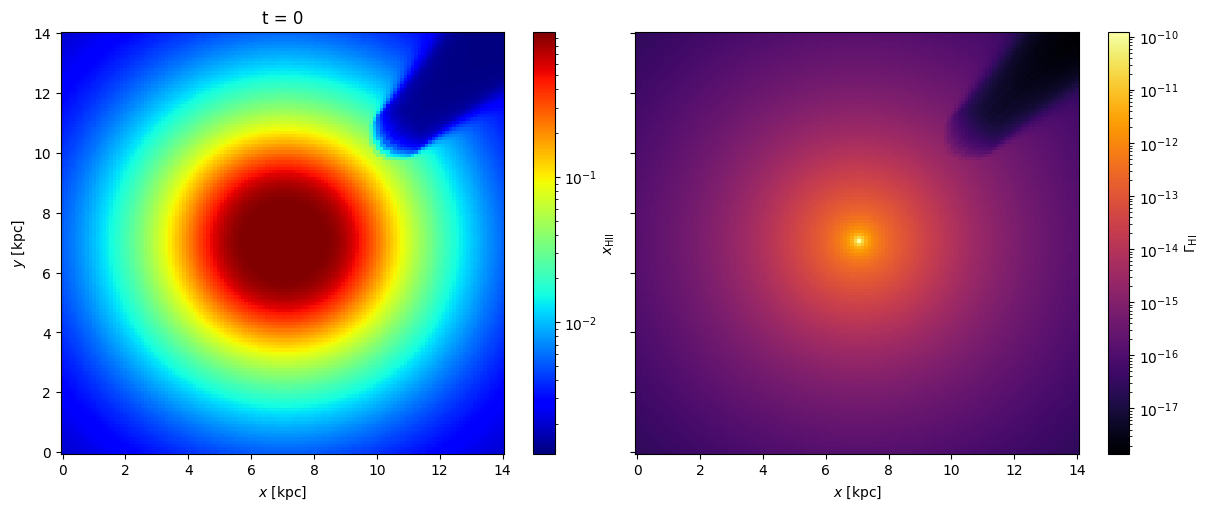

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 3.775e-02
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 1698149 of 2097152 ( 80.974 % ), Relative change in ionfrac:  2.90e+01
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 761102 of 2097152 ( 36.292 % ), Relative change in ionfrac:  8.17e-02
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 306561 of 2097152 ( 14.618 % ), Relative change in ionfrac:  1.24e-02
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  1.31e-03
Rank=0 is doing Raytracing.

<Figure size 640x480 with 0 Axes>

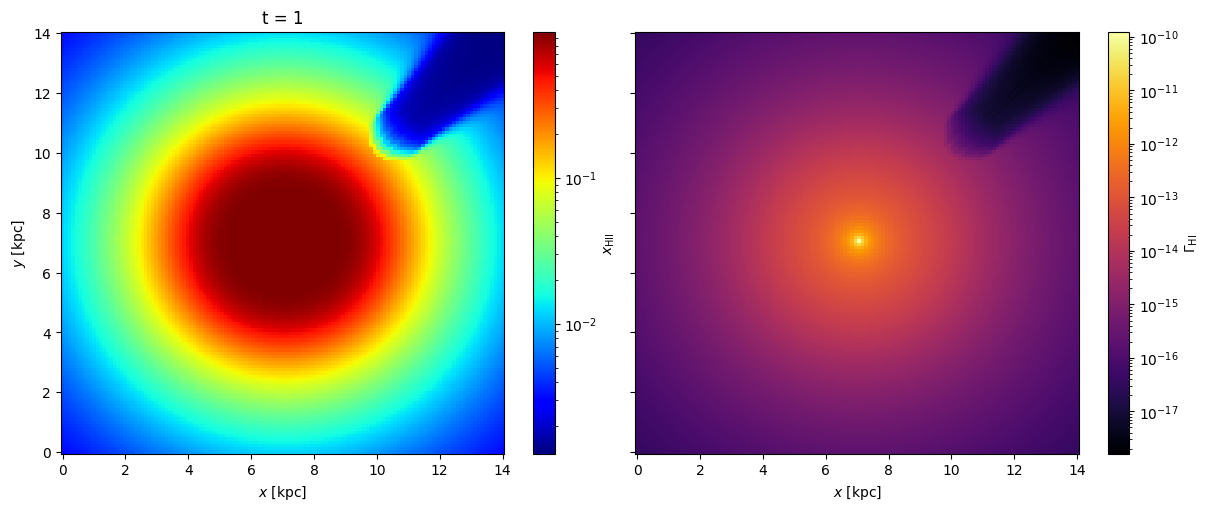

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 7.362e-02
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 1826897 of 2097152 ( 87.113 % ), Relative change in ionfrac:  1.82e+01
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 791095 of 2097152 ( 37.722 % ), Relative change in ionfrac:  4.01e-02
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 164969 of 2097152 ( 7.866 % ), Relative change in ionfrac:  4.17e-03
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  3.08e-04
Rank=0 is doing Raytracing..

<Figure size 640x480 with 0 Axes>

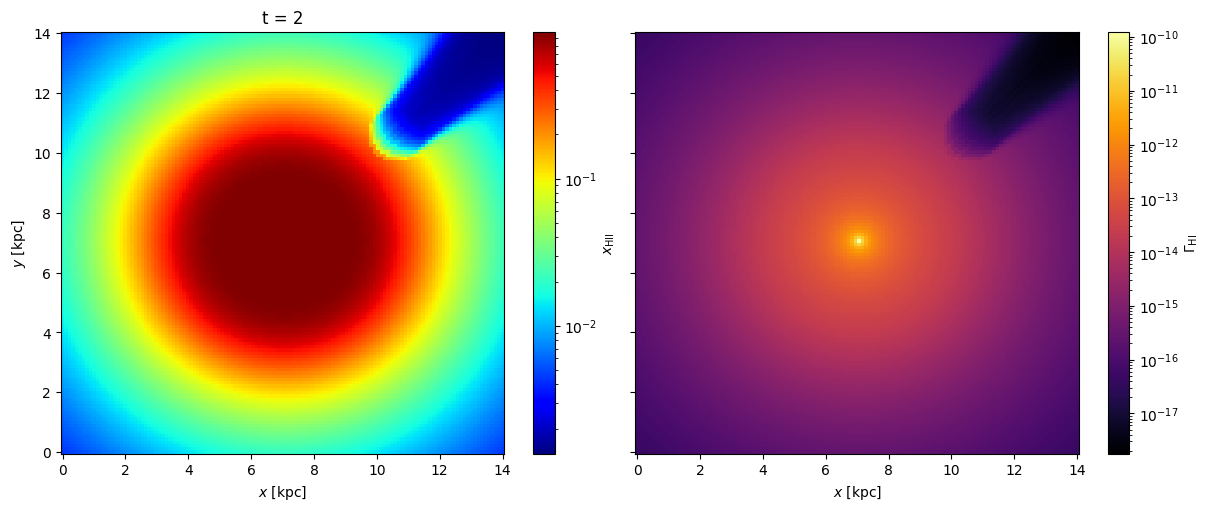

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 1.089e-01
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 1897803 of 2097152 ( 90.494 % ), Relative change in ionfrac:  1.33e+01
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 814851 of 2097152 ( 38.855 % ), Relative change in ionfrac:  2.43e-02
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  1.98e-03
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  1.15e-04
Rank=0 is doing Raytracing... too

<Figure size 640x480 with 0 Axes>

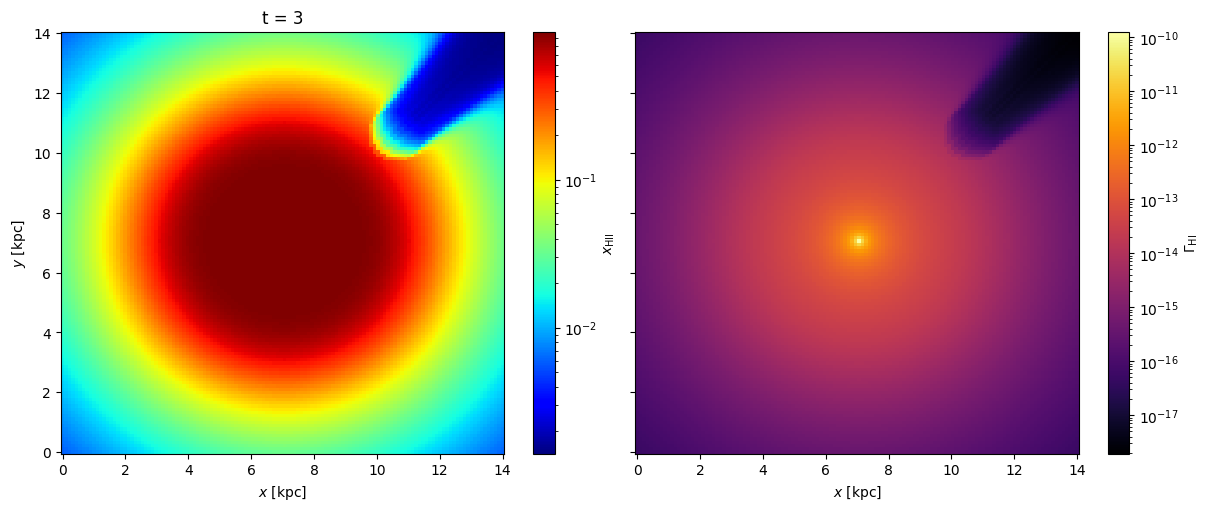

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 1.435e-01
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 1939291 of 2097152 ( 92.473 % ), Relative change in ionfrac:  1.05e+01
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 829498 of 2097152 ( 39.554 % ), Relative change in ionfrac:  1.65e-02
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  1.11e-03
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.1 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  5.42e-05
Multiple source convergence reach

<Figure size 640x480 with 0 Axes>

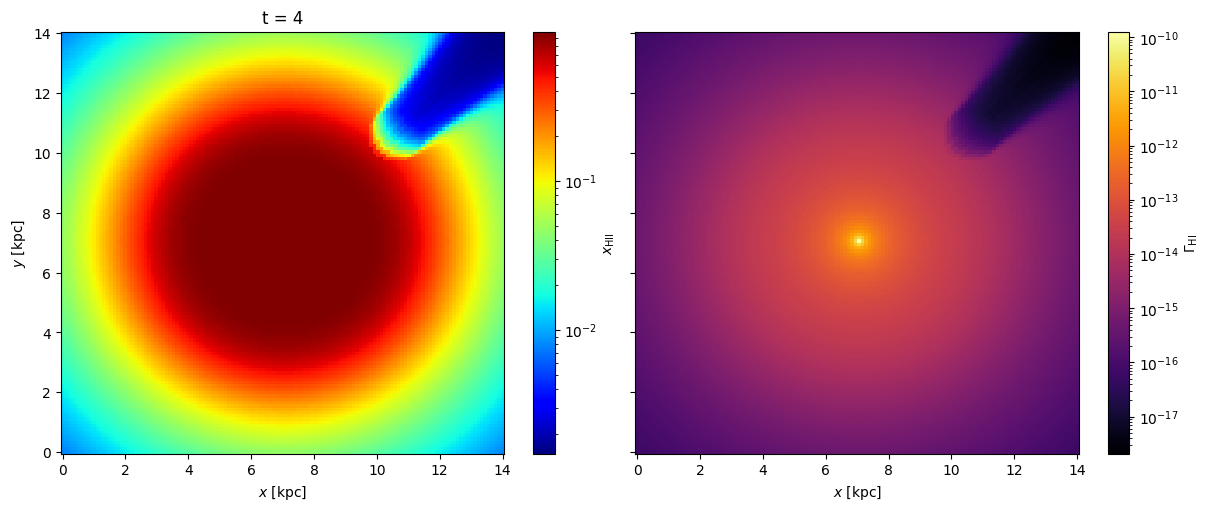

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 1.775e-01
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 1962767 of 2097152 ( 93.592 % ), Relative change in ionfrac:  8.60e+00
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 836404 of 2097152 ( 39.883 % ), Relative change in ionfrac:  1.20e-02
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  6.98e-04
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  2.93e-05
Multiple source convergence reach

<Figure size 640x480 with 0 Axes>

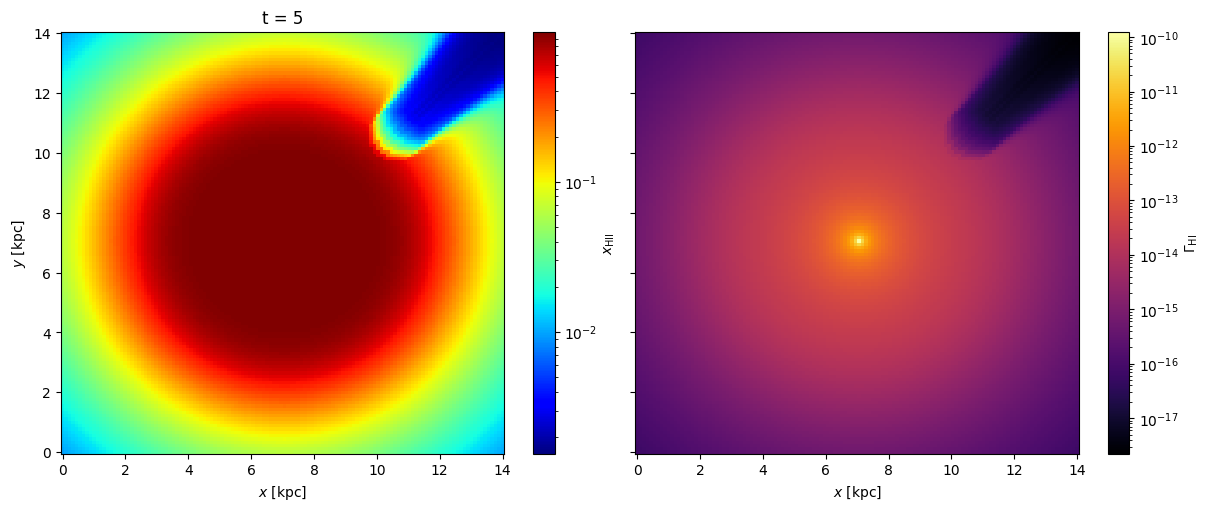

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 2.109e-01
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 1973414 of 2097152 ( 94.100 % ), Relative change in ionfrac:  7.29e+00
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 833375 of 2097152 ( 39.738 % ), Relative change in ionfrac:  9.13e-03
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  4.68e-04
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  1.74e-05
Multiple source convergence reach

<Figure size 640x480 with 0 Axes>

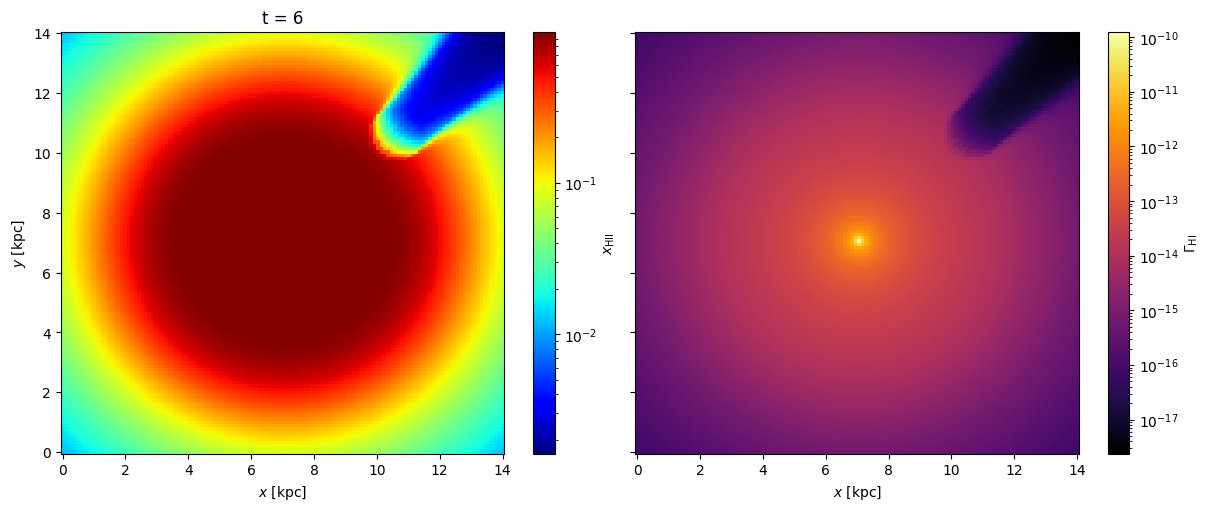

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 2.437e-01
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 1975200 of 2097152 ( 94.185 % ), Relative change in ionfrac:  6.31e+00
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 823283 of 2097152 ( 39.257 % ), Relative change in ionfrac:  7.18e-03
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  3.30e-04
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  1.10e-05
Multiple source convergence reach

<Figure size 640x480 with 0 Axes>

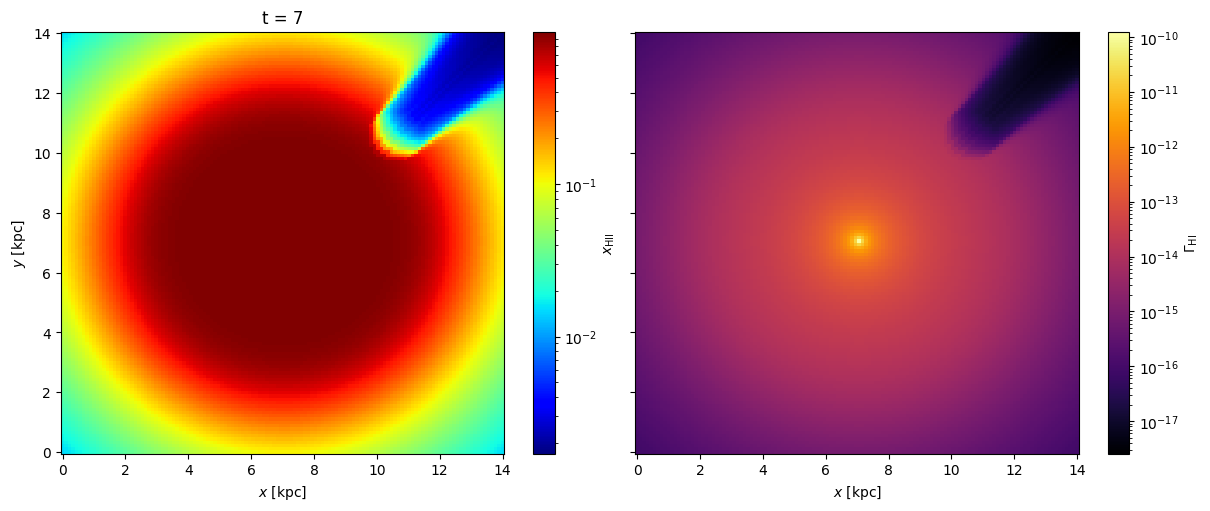

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 2.758e-01
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 1971706 of 2097152 ( 94.018 % ), Relative change in ionfrac:  5.55e+00
Rank=0 is doing Raytracing... took 0.33s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 803691 of 2097152 ( 38.323 % ), Relative change in ionfrac:  5.79e-03
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  2.41e-04
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  7.33e-06
Multiple source convergence reach

<Figure size 640x480 with 0 Axes>

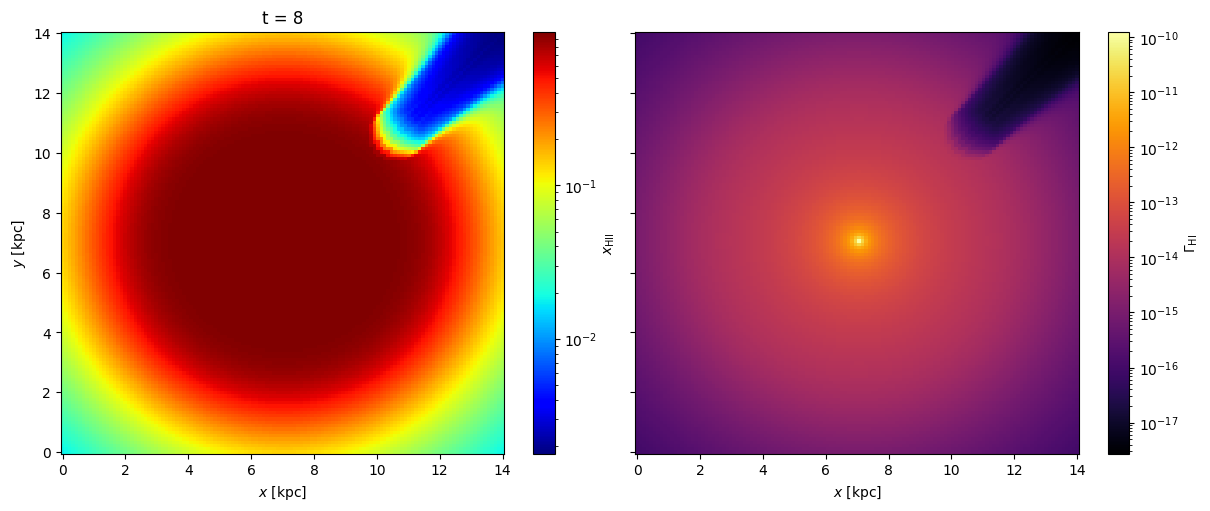

Rank 0 copied source data to device.
Calling evolve3D...
dr [Mpc]: 1.094e-04
dt [years]: 1.000e+06
Running on 1 source(s), total normalized ionizing flux: 1.00e+01
Mean density (cgs): 1.009e-04, Mean ionized fraction: 3.072e-01
Convergence Criterion (Number of points):  0

Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 1963595 of 2097152 ( 93.632 % ), Relative change in ionfrac:  4.95e+00
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 774011 of 2097152 ( 36.908 % ), Relative change in ionfrac:  4.75e-03
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  1.81e-04
Rank=0 is doing Raytracing... took 0.32s.
Doing Chemistry... took  0.2 s.
Number of non-converged points: 0 of 2097152 ( 0.000 % ), Relative change in ionfrac:  5.05e-06
Multiple source convergence reach

<Figure size 640x480 with 0 Axes>

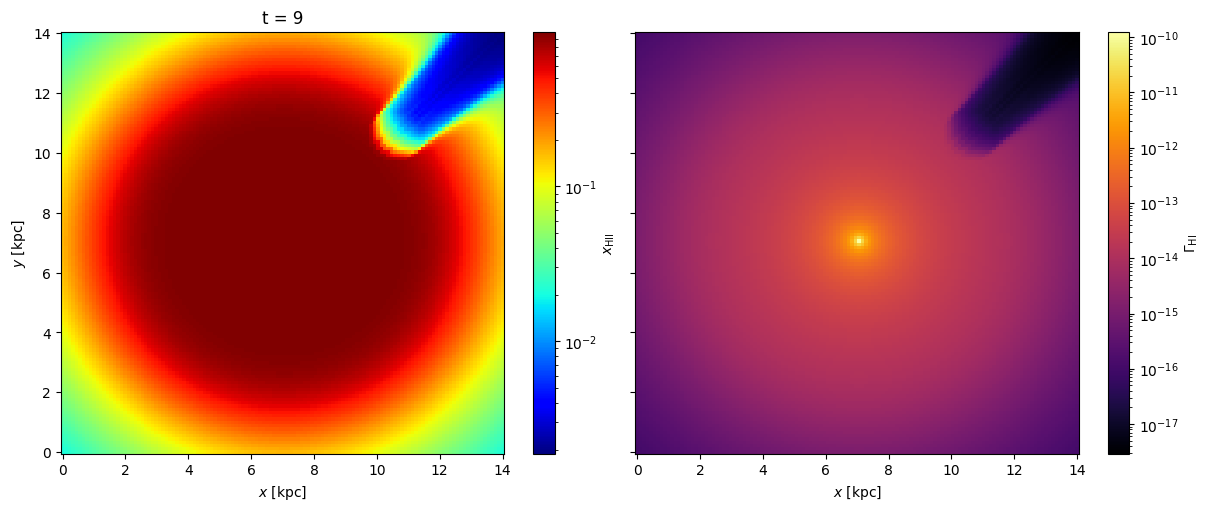

<Figure size 640x480 with 0 Axes>

In [7]:
# Start the timer ot measure the wall clock time
timer = pc2r.Timer()
timer.start()

# Loop over redshifts
for k in range(len(zred_array)-1):
    # Compute timestep of current redshift slice
    zi = zred_array[k]
    zf = zred_array[k+1]
    dt = sim.set_timestep(zi,zf,num_steps_between_slices)

    # Write output
    sim.write_output(zi)

    # Set density field (could be an actual cosmological field here)    
    if(sim.cosmological):
        # The comoving density which is then scaled to the correct redshift. In the timesteps, the density is then "diluted" gradually
        sim.set_constant_average_density(avgdens,0) 
    else:
        sim.ndens = ndens

    sim.printlog("\n=================================\nDoing redshift %.3f to %.3f\n=================================\n" %(zi, zf), sim.logfile)
 
    # Do num_steps_between_slices timesteps
    for t in range(num_steps_between_slices):
        sim.printlog("\n --- Timestep %d. Redshift: z = %.3f --- \n" %(t+1, sim.zred), sim.logfile)

        # Evolve Cosmology: increment redshift and scale physical quantities (density, proper cell size, etc.). If cosmology is disabled in parameter, this step does nothing (checked internally by the class)
        if(sim.cosmological):
            sim.cosmo_evolve(dt)

        # Evolve the simulation: raytrace -> photoionization rates -> chemistry -> until convergence
        sim.evolve3D(dt, srcflux, srcpos)
        
        # Register elapsed Wall clock time
        tnow = timer.lap('t=%d' %t)
        
        # Show results at each timesteps
        if show_plot:
            fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1, constrained_layout=True)

            axs[0].set_title('t = %d' %t)
            im = axs[0].pcolormesh(xc, xc, sim.xh[:,:,sim.N//2], norm=LogNorm(), cmap='jet')
            plt.colorbar(im, ax=axs[0], label=r'$x_\mathrm{HII}$')

            im = axs[1].pcolormesh(xc, xc, sim.phi_ion[:,:,sim.N//2], norm=LogNorm(), cmap='inferno')
            plt.colorbar(im, ax=axs[1], label=r'$\Gamma_\mathrm{HI}$')

            for ax in axs:
                ax.set_xlabel('$x$ [kpc]'), 
                ax.set_ylabel('$y$ [kpc]')
                ax.label_outer()
                
            plt.show(), plt.clf()
        
# Write final output
sim.write_output(zf)

# stop the timer and print the summary
timer.stop()
sim.printlog(timer.summary, sim.logfile)

Let's look at the wall clock time at each time step of our simulation.

In [8]:
print(timer.summary)


--- TIMER SUMMARY ---
 step 1: 3.78s - t=0
 step 2: 3.41s - t=1
 step 3: 2.91s - t=2
 step 4: 2.95s - t=3
 step 5: 2.42s - t=4
 step 6: 2.57s - t=5
 step 7: 2.47s - t=6
 step 8: 2.48s - t=7
 step 9: 2.47s - t=8
 step 10: 2.47s - t=9
Elapsed time: 28.57s 


## Final Result
Here, we plot the final result and highlight the denser region with contour lines.

We can notice that the radiation manages to propagate into the denser region. However, the neutral hydrogen in the denser region remains neutral despite the intense ionizing flux. 

Moreover, the HI gas in the shadow behind the clump is unaffected by radiation.

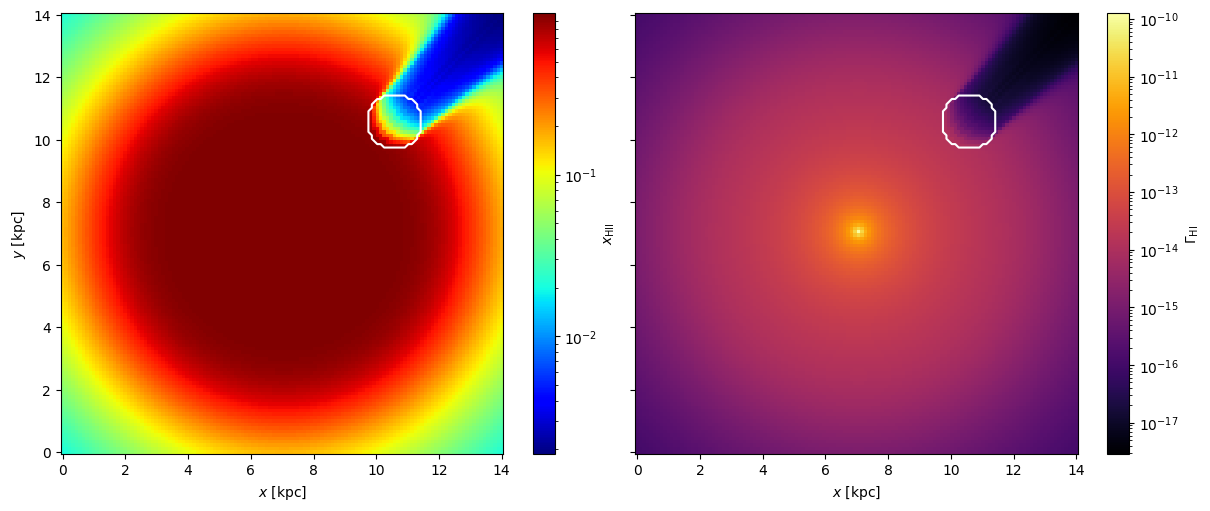

In [9]:
fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1, constrained_layout=True)

im = axs[0].pcolormesh(xc, xc, sim.xh[:,:,sim.N//2], norm=LogNorm(), cmap='jet')
plt.colorbar(im, ax=axs[0], label=r'$x_\mathrm{HII}$')

im = axs[1].pcolormesh(xc, xc, sim.phi_ion[:,:,sim.N//2], norm=LogNorm(), cmap='inferno')
plt.colorbar(im, ax=axs[1], label=r'$\Gamma_\mathrm{HI}$')

for ax in axs:
    ax.contour(xc, xc, sim.ndens[:,:,sim.N//2], levels=1, colors='white')
    ax.set_xlabel('$x$ [kpc]'), 
    ax.set_ylabel('$y$ [kpc]')
    ax.label_outer()